# Autonomous Underwater Vehicle Fault Diagnosis

Ji, Daxiong (2021), “Autonomous Underwater Vehicle Fault Diagnosis Dataset”, Mendeley Data, V1, doi: 10.17632/7rp2pmr6mx.1

Dataset source: https://data.mendeley.com/datasets/7rp2pmr6mx/1

In [33]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sktime.datatypes import convert_to
from sktime.datatypes._panel._convert import (
    from_3d_numpy_to_nested,
    from_3d_numpy_to_multi_index,
    from_multi_index_to_nested
)

%matplotlib inline

## Data processing

In [47]:
def get_label(file_path):
    return file_path.replace("\\", "/").split("/")[-2]

def reorder_columns(columns):
    cols = list(columns)
    return cols[-2:] + cols[:-2]

def get_data(dataset_path):
    df = pd.DataFrame()
    labels = []
    instance_id = 0
    DF_LENGTH = 180

    for file_path in glob.glob(dataset_path, recursive=True):
        df_tmp = pd.read_csv(file_path)

        if len(df_tmp) < DF_LENGTH:
            continue

        df_tmp = df_tmp[0:DF_LENGTH]
        df_tmp["instances"] = instance_id
        df_tmp["timepoints"] = list(range(0, DF_LENGTH))

        cols = reorder_columns(df_tmp.columns)
        df_tmp = df_tmp[cols]

        df = pd.concat([df, df_tmp])
        df = df.reset_index(drop=True)
        labels.append(get_label(file_path))
        instance_id += 1

    df = df.drop(["time"], axis=1)
    df = df.set_index(["instances", "timepoints"])

    return df, labels

In [50]:
%%time
# dataset_path = '/mnt/f/Downloads/Autonomous-Underwater-Vehicle-Fault-Diagnosis-Dataset/Dataset/train/**/*.csv'
# dataset_path = "C:/Users/NABS/Downloads/autonomous-uboot/train/**/*.csv"

df_train, labels_train = get_data("C:/Users/NABS/Downloads/autonomous-uboot/train/**/*.csv")

CPU times: total: 20.3 s
Wall time: 20.5 s


In [51]:
%%time

df_test, labels_test = get_data("C:/Users/NABS/Downloads/autonomous-uboot/test/**/*.csv")

CPU times: total: 1.67 s
Wall time: 1.69 s


In [52]:
# preprocessed_path = "/mnt/f/Downloads/Autonomous-Underwater-Vehicle-Fault-Diagnosis-Dataset/Dataset/preprocessed/"
preprocessed_path = "C:/Users/NABS/Downloads/autonomous-uboot/preprocessed/"
df_train.to_parquet(preprocessed_path + "features-train.parquet", index=True)
df_test.to_parquet(preprocessed_path + "features-test.parquet", index=True)

In [53]:
pd.DataFrame(labels_train, columns=["label"]).to_csv(preprocessed_path + "labels-train.csv", index=False)
pd.DataFrame(labels_test, columns=["label"]).to_csv(preprocessed_path + "labels-test.csv", index=False)

## Simple Exploratory data analysis (EDA)

In [54]:
df_train.head()

pwm1  pwm2  pwm3  pwm4  depth  press  voltage  roll  \
instances timepoints                                                        
0         0           1100  1100  1100  1100  -0.02    592    12.08  5.97   
          1           1100  1100  1100  1100  -0.01    593    12.08  6.05   
          2           1100  1100  1100  1100   0.00    594    12.06  6.12   
          3           1183  1183  1183  1183   0.01    595    12.05  6.18   
          4           1183  1183  1183  1183   0.01    595    11.97  6.21   

                      pitch    yaw   a_x   a_y   a_z  w_row  w_pitch  w_yaw  
instances timepoints                                                         
0         0           -0.06  37.16 -0.02  0.90  8.76    1.6     -2.1    0.3  
          1           -0.19  37.16  0.13  0.95  8.56    1.5     -3.0    0.4  
          2           -0.34  37.17  0.07  0.88  8.64    1.3     -3.4    0.2  
          3           -0.51  37.17  0.09  0.96  8.80    0.6     -3.3    0.3  
          4           -0.66  37.17  0.07  1.00  8.61    0.2     -2.7    0.1

In [58]:
np.unique(labels_train)

array(['AddWeight', 'Normal', 'PressureGain_constant',
       'PropellerDamage_bad', 'PropellerDamage_slight'], dtype='<U22')

In [81]:
np.where(np.array(labels_train) == "PropellerDamage_bad")

(array([570, 571, 572, 573, 574, 575, 576, 577, 578, 579, 580, 581, 582,
        583, 584, 585, 586, 587, 588, 589, 590, 591, 592, 593, 594, 595,
        596, 597, 598, 599, 600, 601, 602, 603, 604, 605, 606, 607, 608,
        609, 610, 611, 612, 613, 614, 615, 616, 617, 618, 619, 620, 621,
        622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634,
        635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647,
        648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660,
        661, 662, 663, 664, 665, 666, 667, 668, 669, 670, 671, 672, 673,
        674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686,
        687, 688, 689, 690, 691, 692, 693, 694, 695, 696, 697, 698, 699,
        700, 701, 702, 703, 704, 705, 706, 707, 708, 709, 710, 711, 712,
        713, 714, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725,
        726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738,
        739, 740, 741, 742, 743, 744, 745, 746, 747

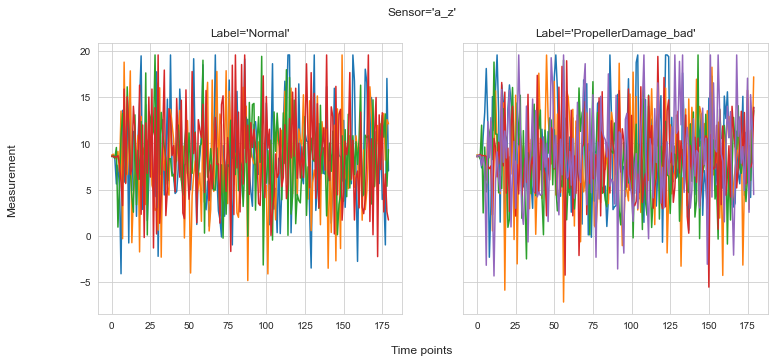

In [107]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(12, 5))

label = "Normal"
sensor = "a_z"

for i in [214, 215, 216, 217]:
    ax1.plot(df_train.loc[i][sensor].values)
    ax1.set_title(f"Label='{label}'")

label = "PropellerDamage_bad"

for i in [570, 571, 572, 573, 574]:
    ax2.plot(df_train.loc[i][sensor].values)
    ax2.set_title(f"Label='{label}'")

fig.suptitle(f"Sensor='{sensor}'")
fig.supxlabel('Time points')
fig.supylabel('Measurement')
plt.show()